# Simple Plot - Event - Gyro_Velocity

# Measurement Data
* Velocity

# Import modules

In [167]:
from datetime import datetime, timedelta
import pandas as pd
#%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Constants relevant for the graphs:

In [168]:
colors=['violet','darkgreen','black','red']
#colors=['b','g','k','r']
linestyles=['--','--','--','--']
markers=[ "^", "+", '*', '*'] 
#markers=[ "^", "+", '*', '.'] # optional : marker=(8,2,0)

#### Specify file to read in

In [169]:
# Configure your input file here:
fileName    = "./data/VCMeasure257.csv"

##### Create a dataframe from measurement data in csv file
##### Set Time column as the index 

In [170]:
# Read CSV file into a pandas dataframe 
OrigDataFrame   = pd.read_csv(fileName);
df = OrigDataFrame.copy()
# Change timestamp to python datatime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time',inplace=True)
df = df.reindex(columns=['Speed','Target','Percent','Error'])
# Print the first three and last three rows of measurements
df.take([0,1,2,-3,-2,-1])

Speed    Target    Percent  Error
Time                                                   
1970-01-01 13:09:41     0.0    28.125   0.000000    0.0
1970-01-01 13:09:55     0.0   -28.125   0.000000    0.0
1970-01-01 13:10:09     0.0    28.125   0.000000    0.0
1970-01-03 13:06:00 -1101.0 -2160.000 -34.897361 -154.0
1970-01-03 13:06:19  1100.0  1974.375  34.897361  173.0
1970-01-03 13:06:20 -1099.0 -1974.375 -34.897361 -154.0

# Collect the hour chunks in the data.
#### This is done to ignore the data in the log where there were no measurements.

In [176]:
# Create a list of relevant measurement periods in the data
dfDay= [group[1] for group in df.groupby(df.index.day)]
dfHourList = []
#print("Total days of measuements:", len(dfDay))
for i in range(len(dfDay)):
    dfHour = [group[1] for group in dfDay[i].groupby(dfDay[i].index.hour)]
    for j in range(len(dfHour)):
        #print("Day: ", i, "Hour: ", j)
        dfHourList.append(dfHour[j])
# Show the range of the time stamps
print("The following hour long chunks were found in the data:")
for i in range(len(dfHourList)):
    print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
print("Total hours", len(dfHourList))

The following hour long chunks were found in the data:
Month  1 Day  1 Hour  13
Month  1 Day  1 Hour  14
Month  1 Day  1 Hour  15
Month  1 Day  1 Hour  16
Month  1 Day  1 Hour  17
Month  1 Day  1 Hour  18
Month  1 Day  1 Hour  19
Month  1 Day  3 Hour  11
Month  1 Day  3 Hour  12
Month  1 Day  3 Hour  13
Total hours 10


# Configure to view a particular column(s) and timeslice(s):

In [177]:
# Configure what you want to see:
#labeliz = ['Target']
labeliz = ['Speed','Target','Percent','Error']
#coloriz='darkblue'
coloriz=['violet','darkgreen','black','red']
markeriz='+'
lsiz='--'
#dfHourListiz=[dfHourList[0]]  # To see specific hours change this to be = dfHourList
dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourList
resample=0  # 0 or 1

Month  1 Day  1 Hour 13


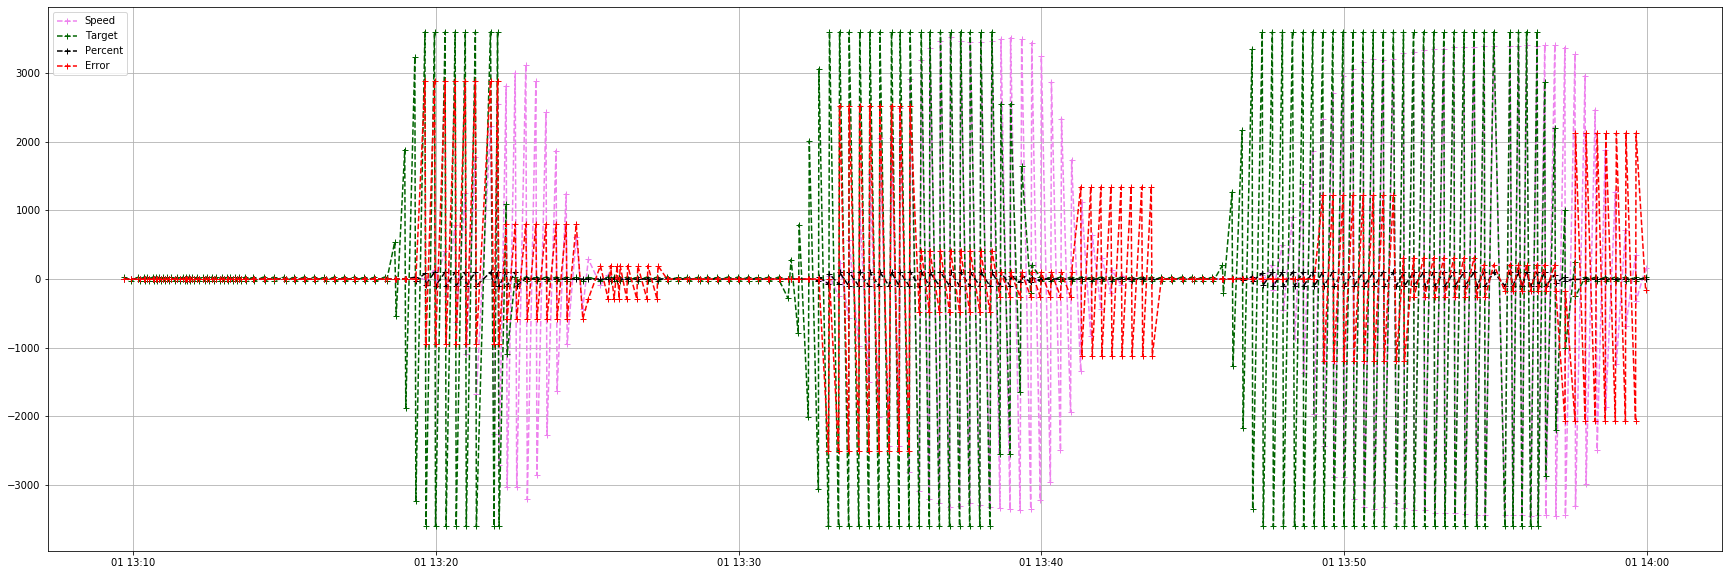

Month  1 Day  1 Hour 14


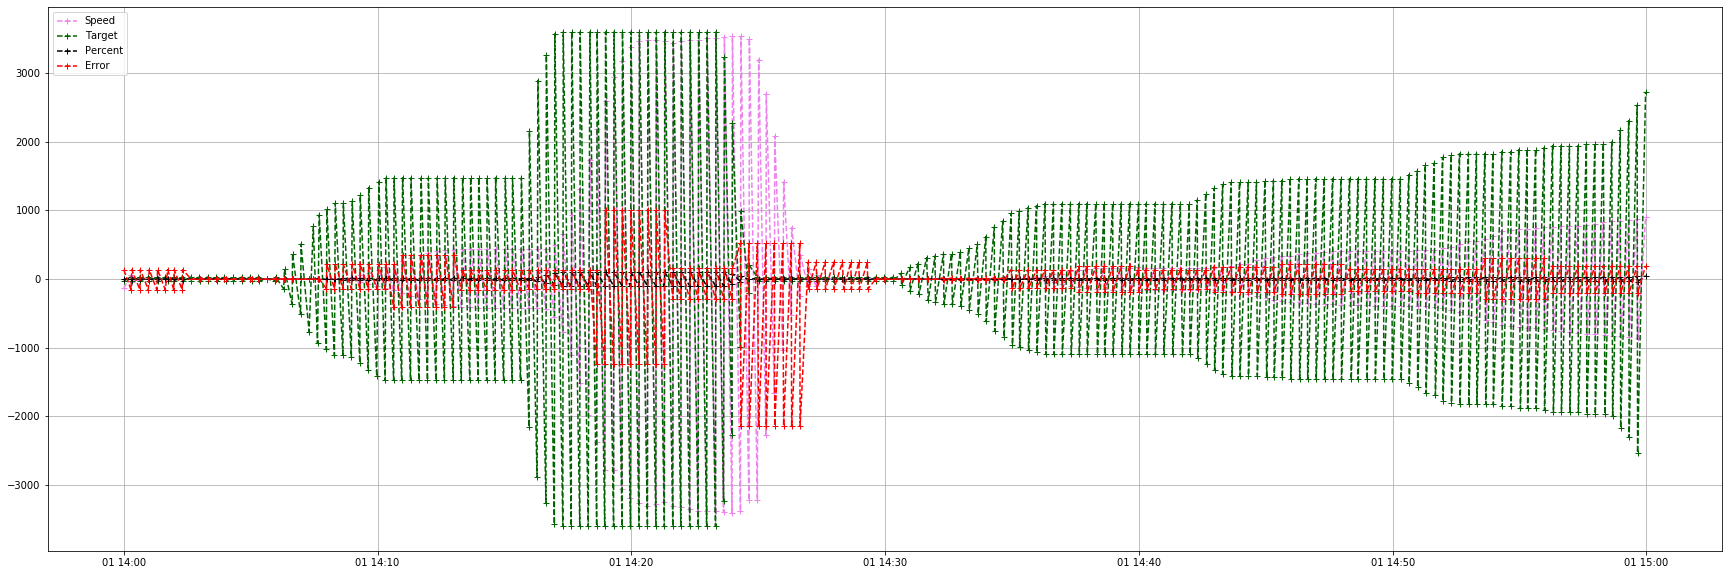

Month  1 Day  1 Hour 15


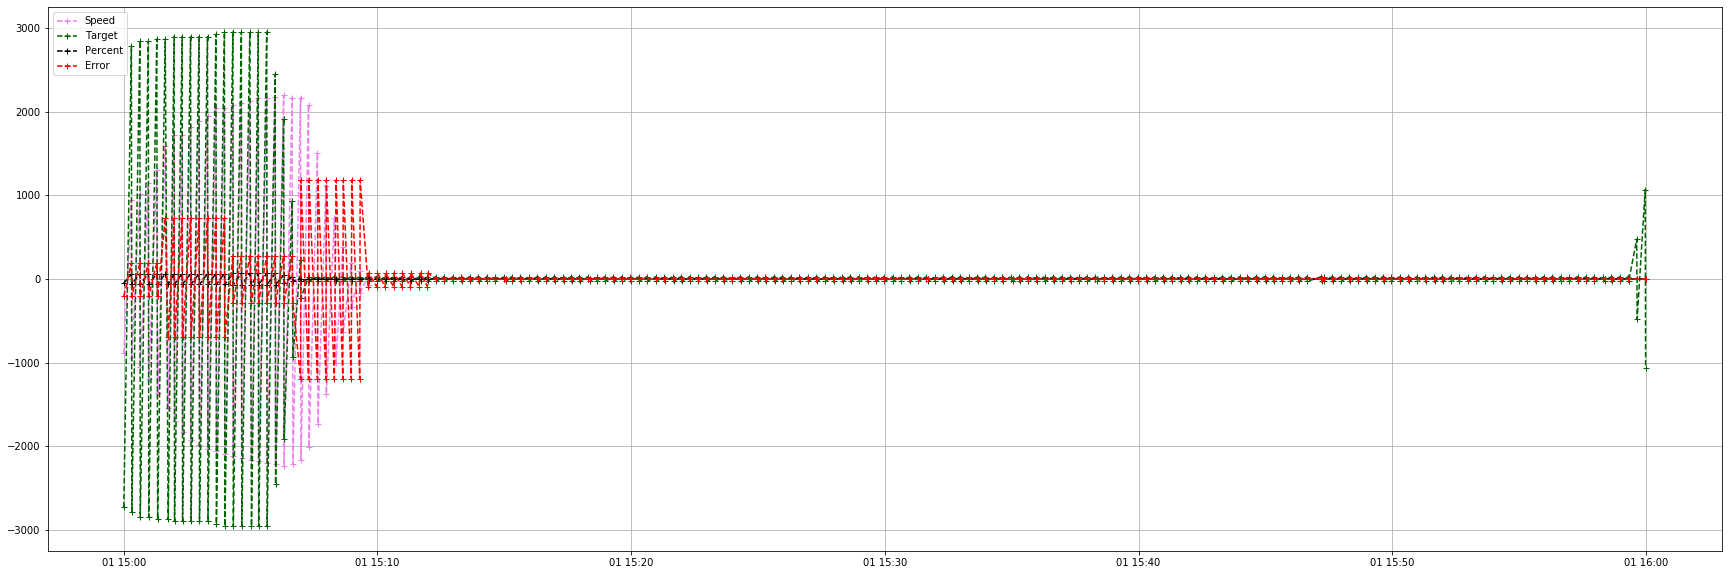

Month  1 Day  1 Hour 16


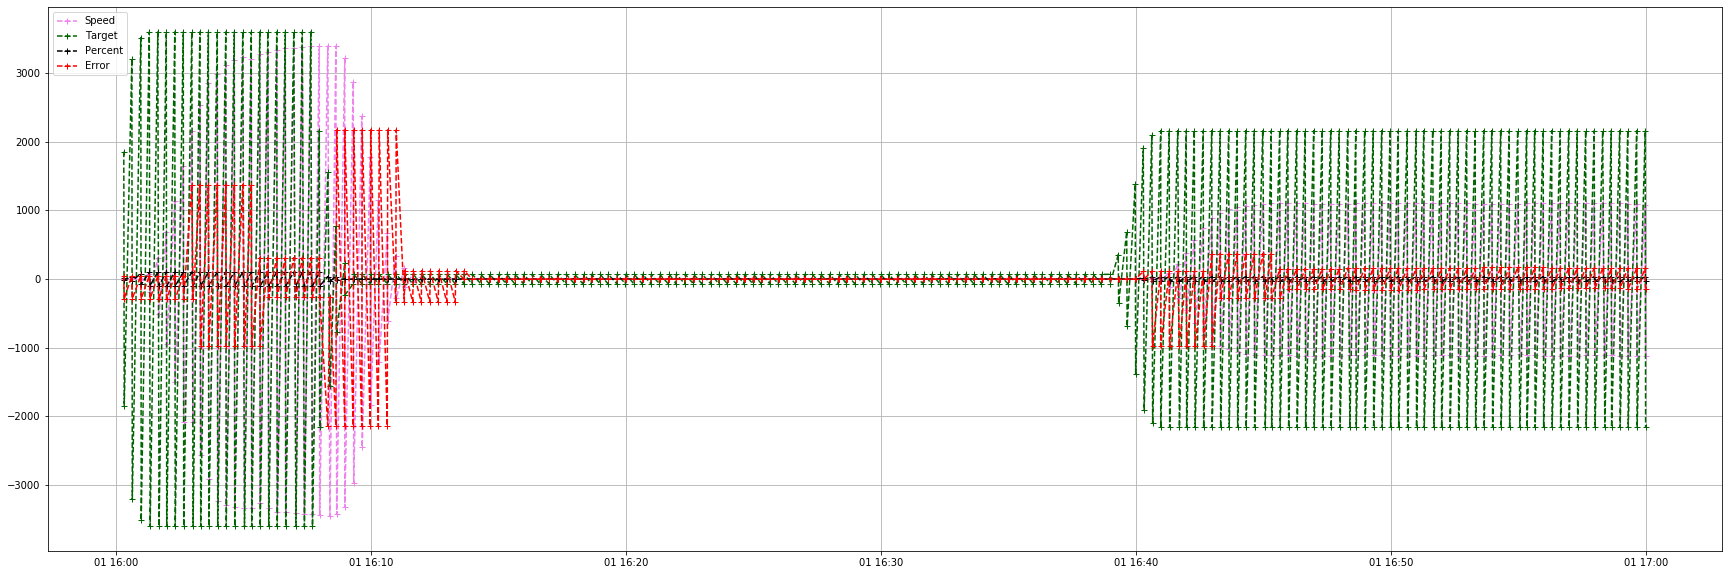

Month  1 Day  1 Hour 17


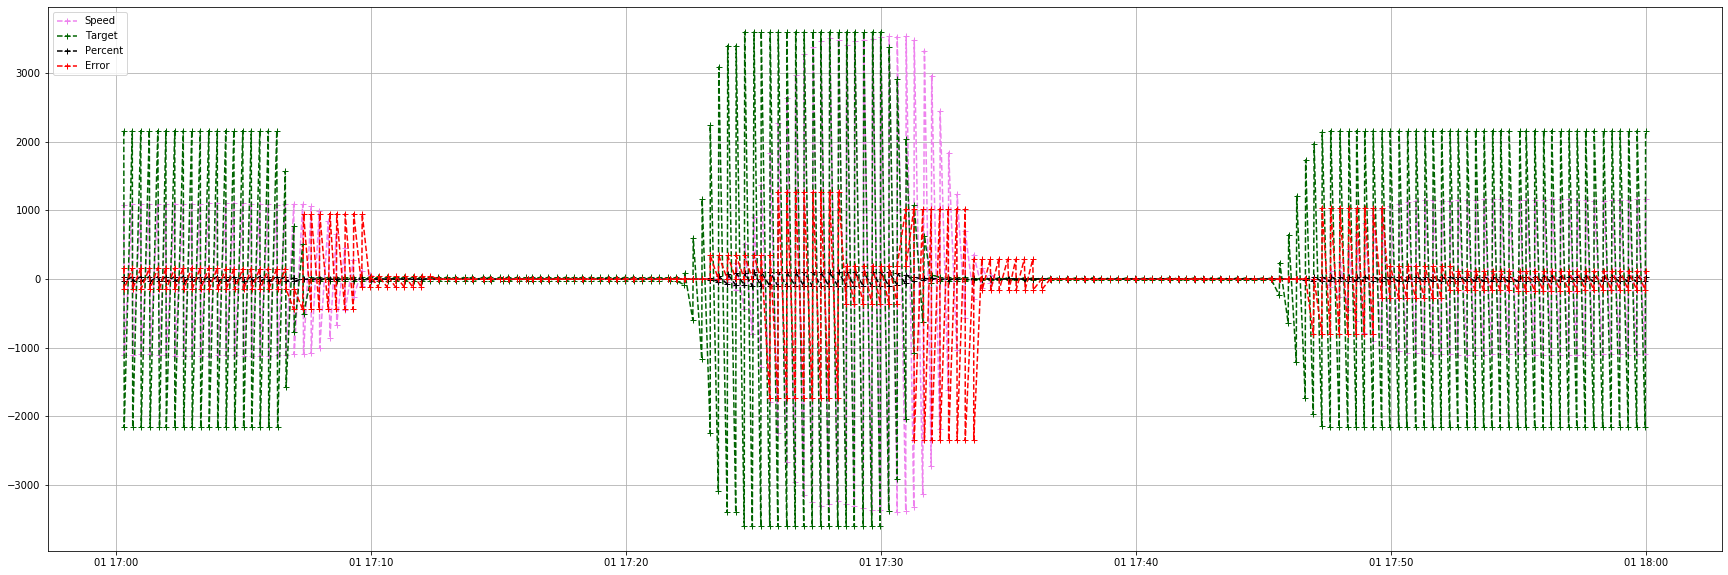

Month  1 Day  1 Hour 18


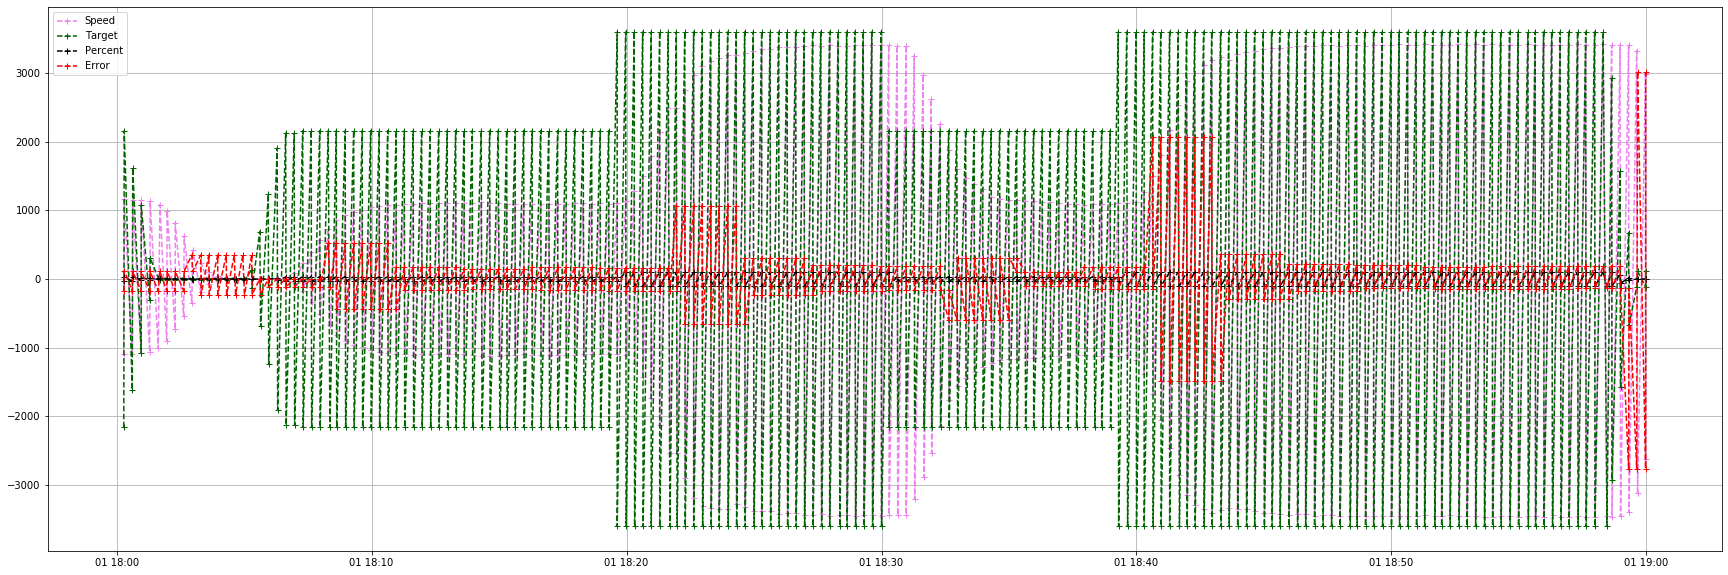

Month  1 Day  1 Hour 19


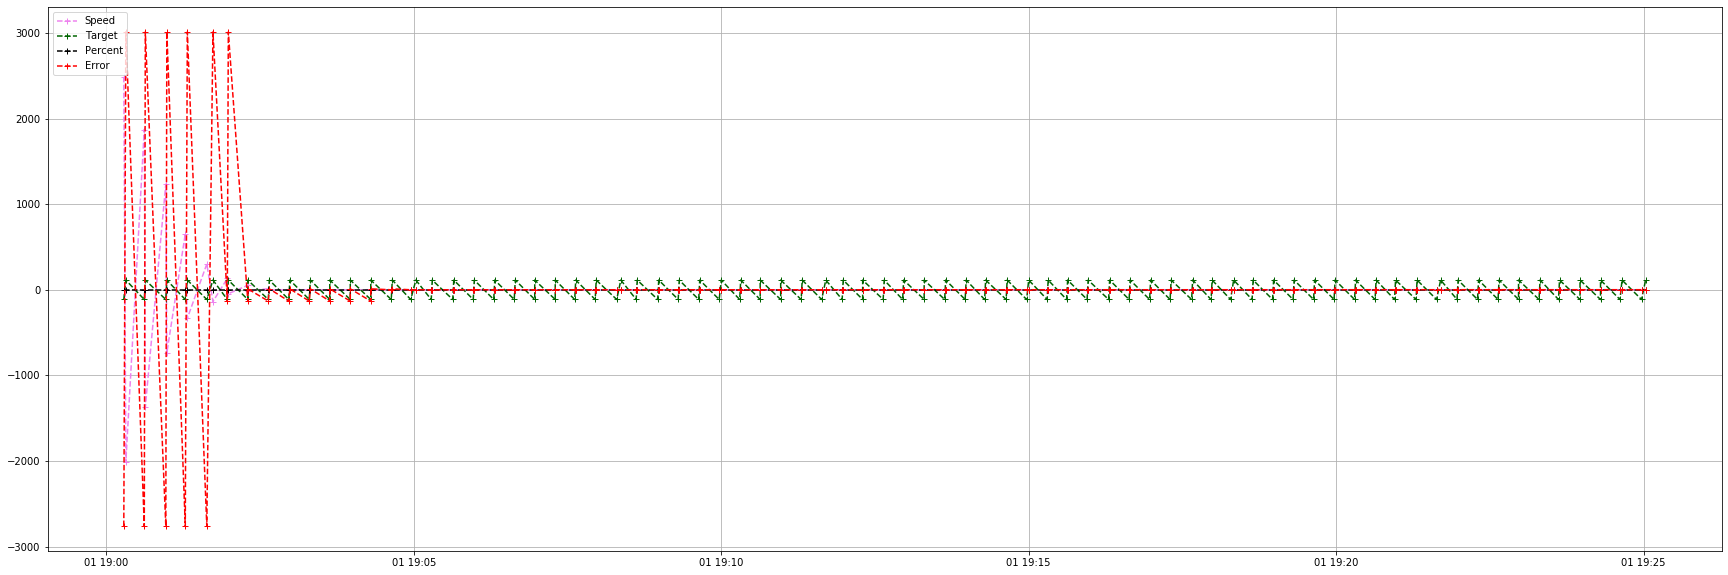

Month  1 Day  3 Hour 11


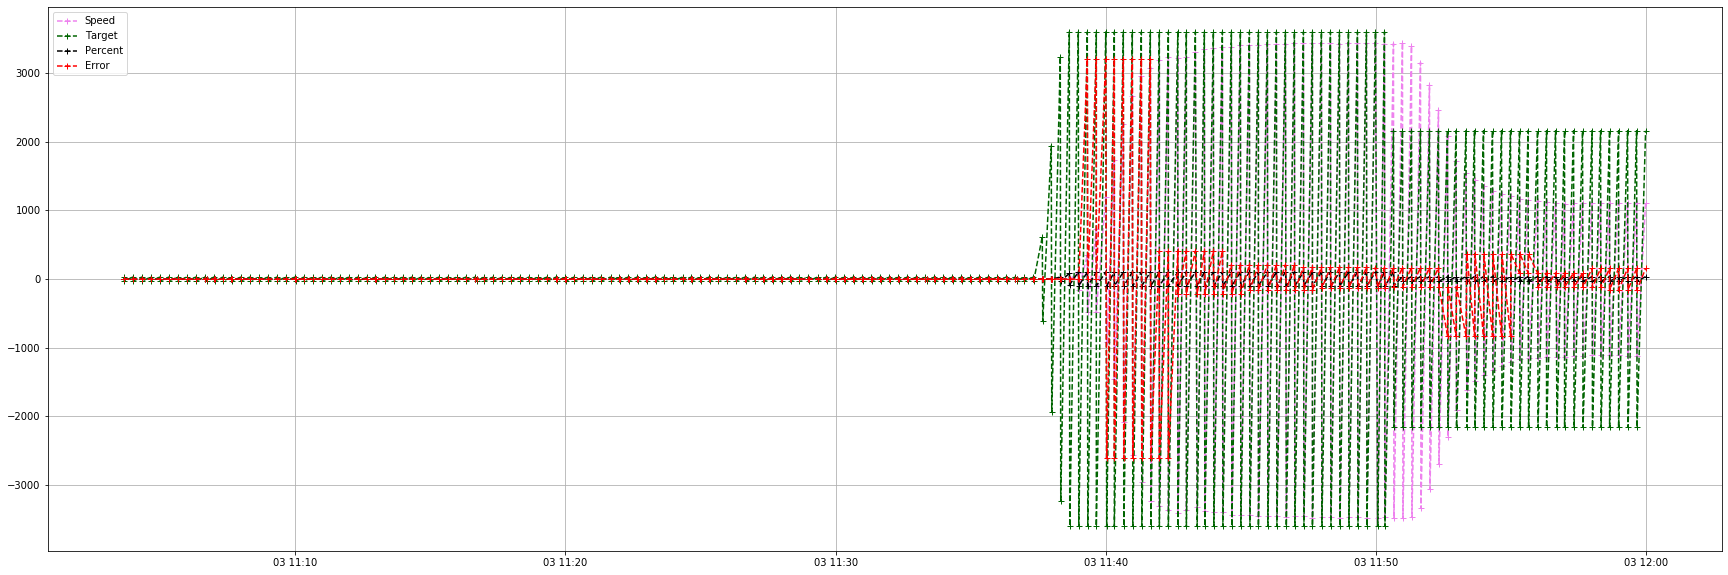

Month  1 Day  3 Hour 12


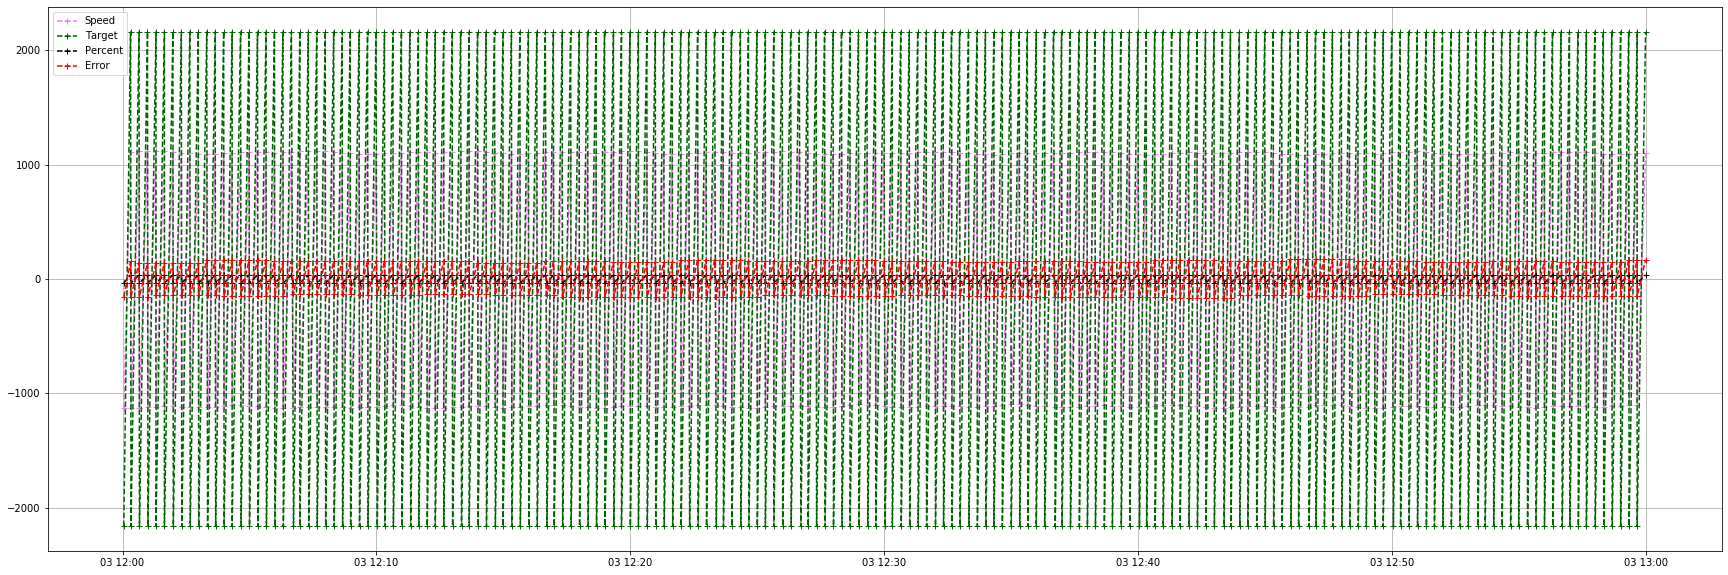

Month  1 Day  3 Hour 13


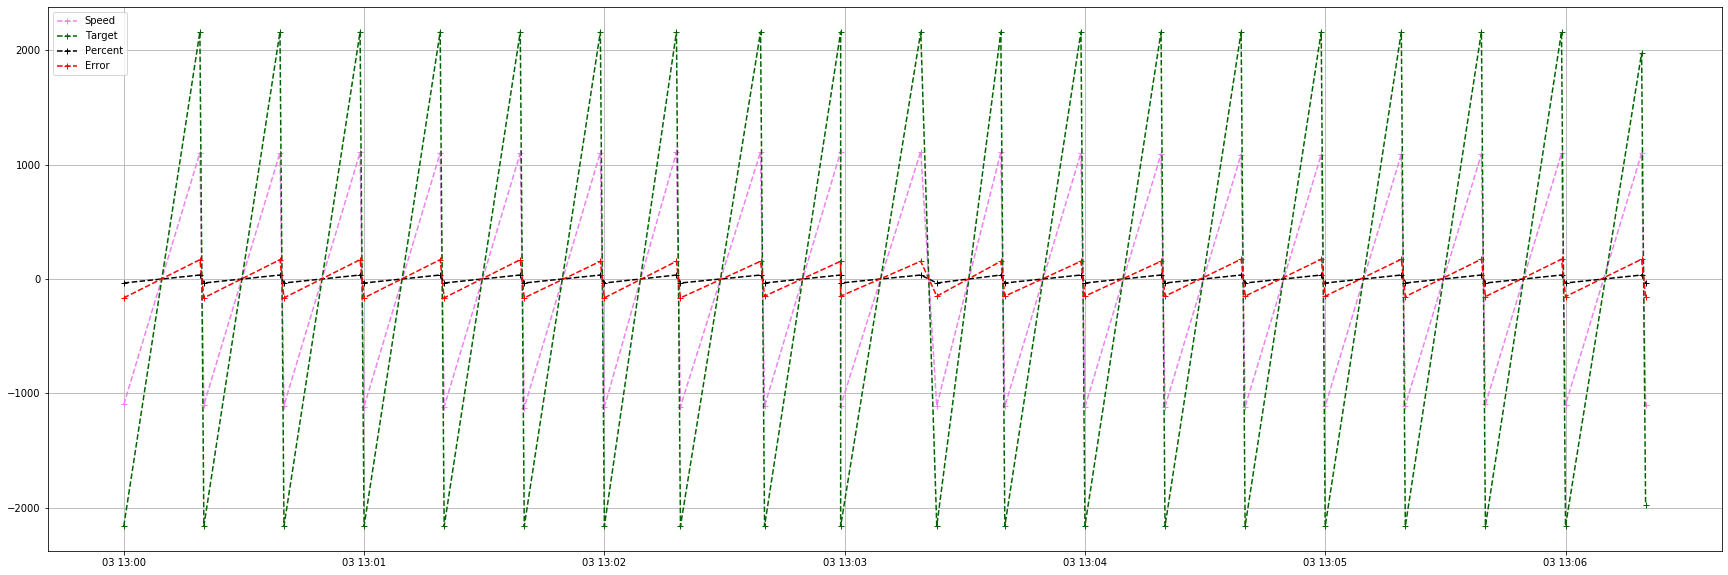

In [178]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            ax.plot(dfHourList[i].index,dfHourList[i][labeliz[j]],c=coloriz[j],marker=markeriz,ls=lsiz,label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourList[i].resample('s').mean().index,dfHourList[i][labels[j]].resample('s').mean(),c=coloriz[j],marker=markeriz,ls=lsiz,label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour",dfHourList[i].index[0].hour)
    ax.set_title(title)
    plt.show()

# Exponential Smoothing - Just to see what we get

In [179]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [180]:
#Color, marker and linestyle are defined on top of the file. If you want to change the settings define them here.
#For example:
#colors=['violet','darkgreen','black','red']
#linestyles=['--','--','--','--']
#markers=[ "^", "+", '*', '*'] 
def plotExponentialSmoothing_methods(series, label, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    j=0
    for alpha in alphas:
            ax.plot(exponential_smoothing(series, alpha), c=colors[j],marker=markers[j],ls=linestyles[j],label="Alpha {}".format(alpha))
            j = j+1
    ax.plot(series.values, "c", label = "Actual")

# Configure to view a particular column(s) and timeslice(s):

In [181]:
#labeliz=dfHourList[0].columns  # Uncomment To see all columns
labeliz = ['Target','Speed']
#dfHourListiz=dfHourList       # Uncomment To see all hours
#dfHourListiz= [dfHourList[2],dfHourList[3],dfHourList[4]]
#dfHourListiz= [dfHourList[2]]
dfHourListiz= dfHourList
alphas=[0.3,0.005,0.0099]

 Month  1 Day  1 Hour 13


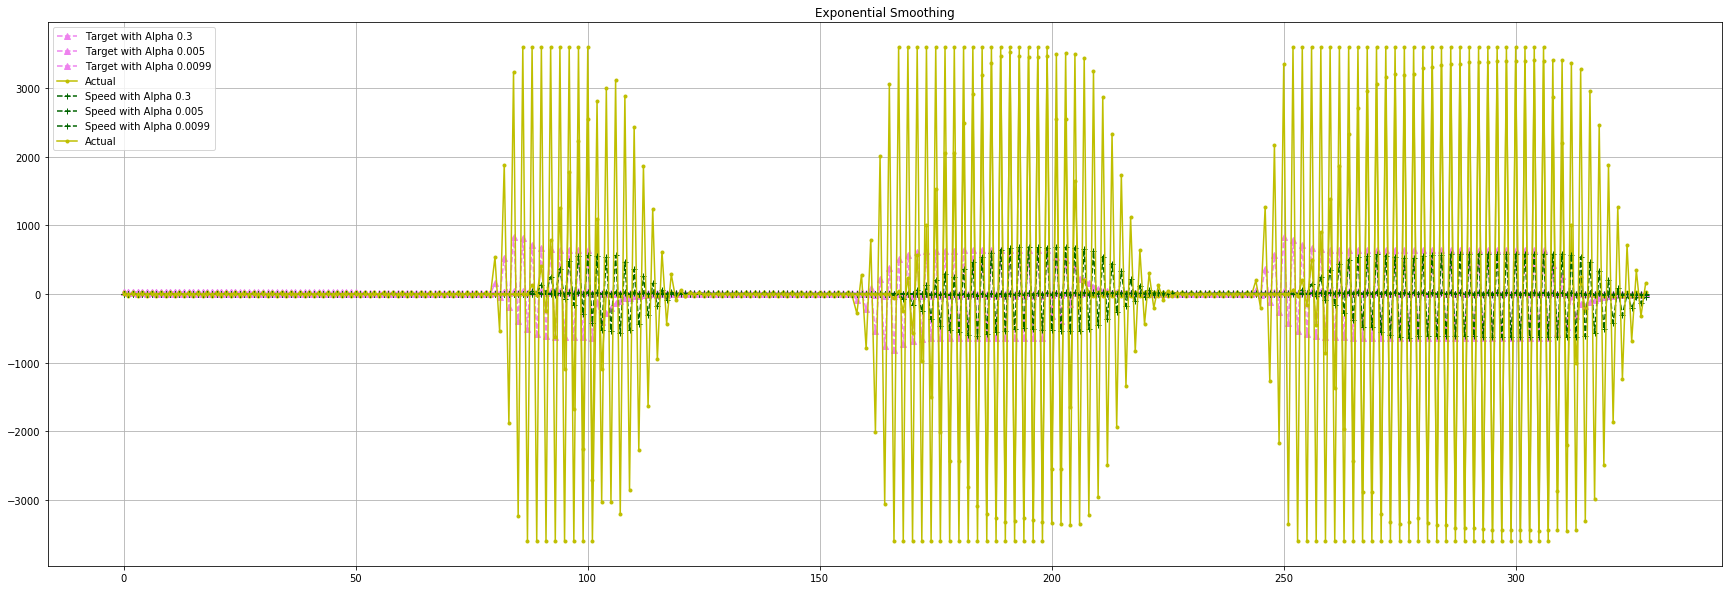

 Month  1 Day  1 Hour 14


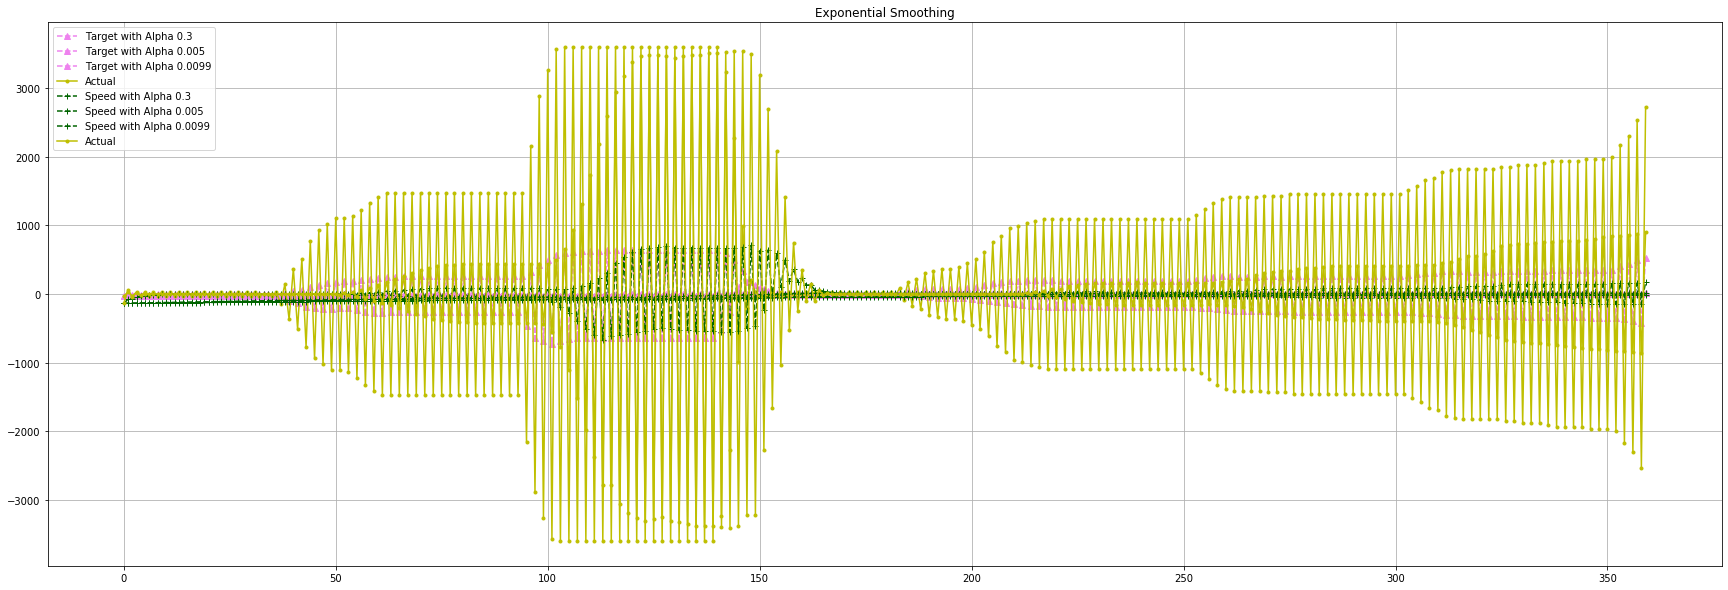

 Month  1 Day  1 Hour 15


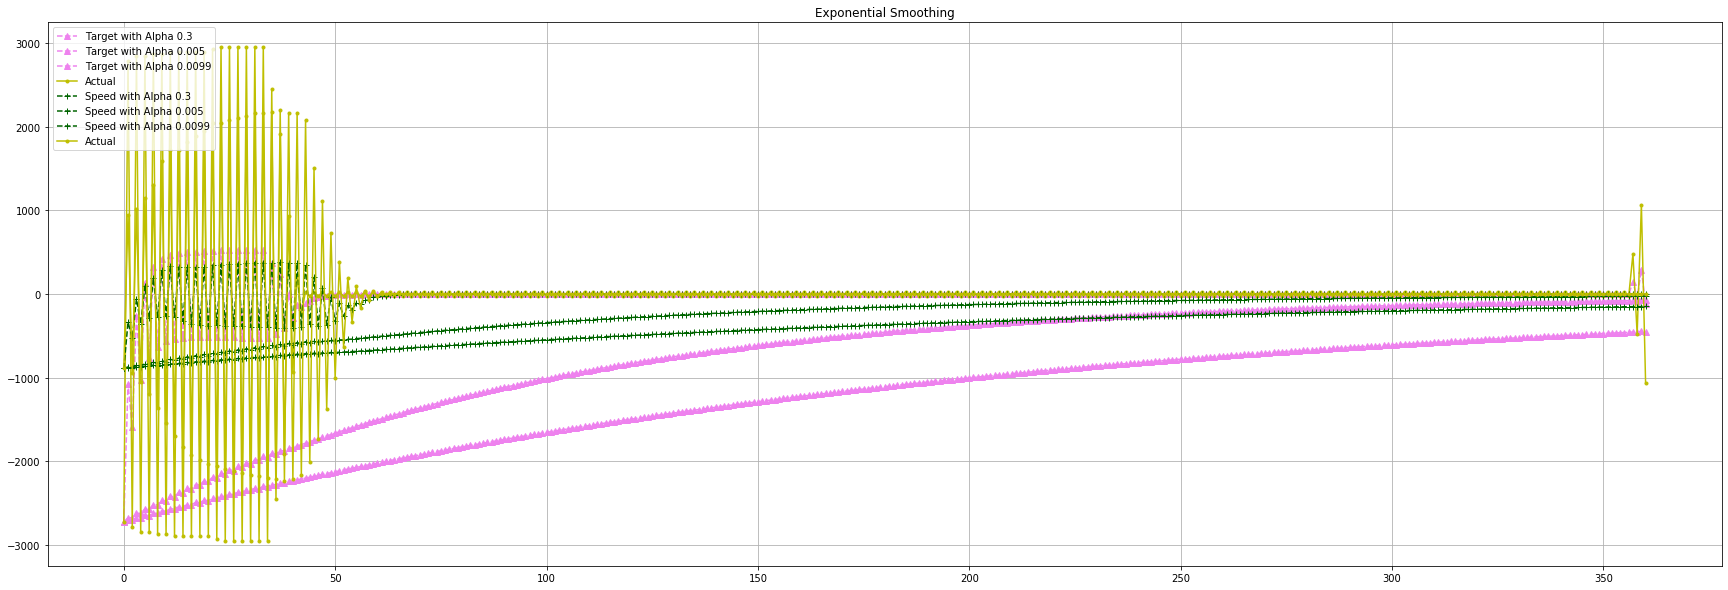

 Month  1 Day  1 Hour 16


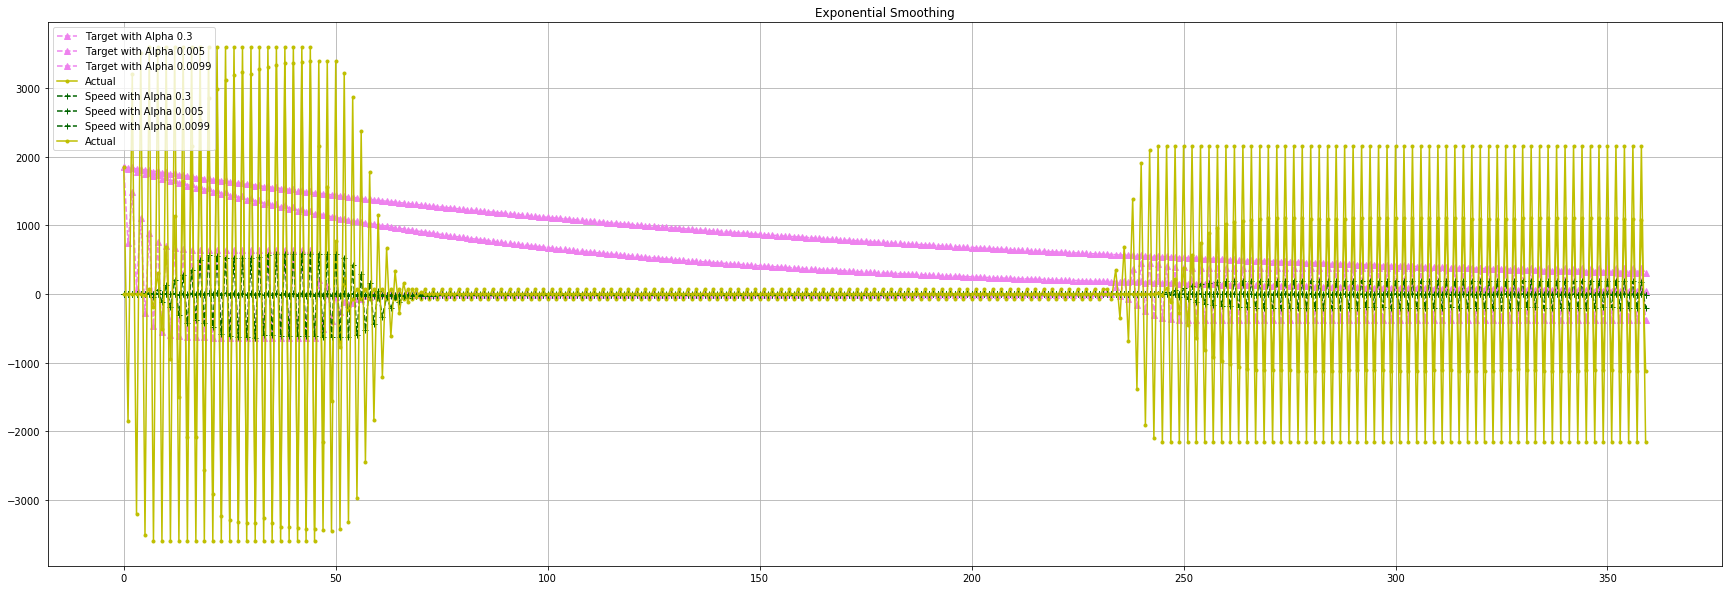

 Month  1 Day  1 Hour 17


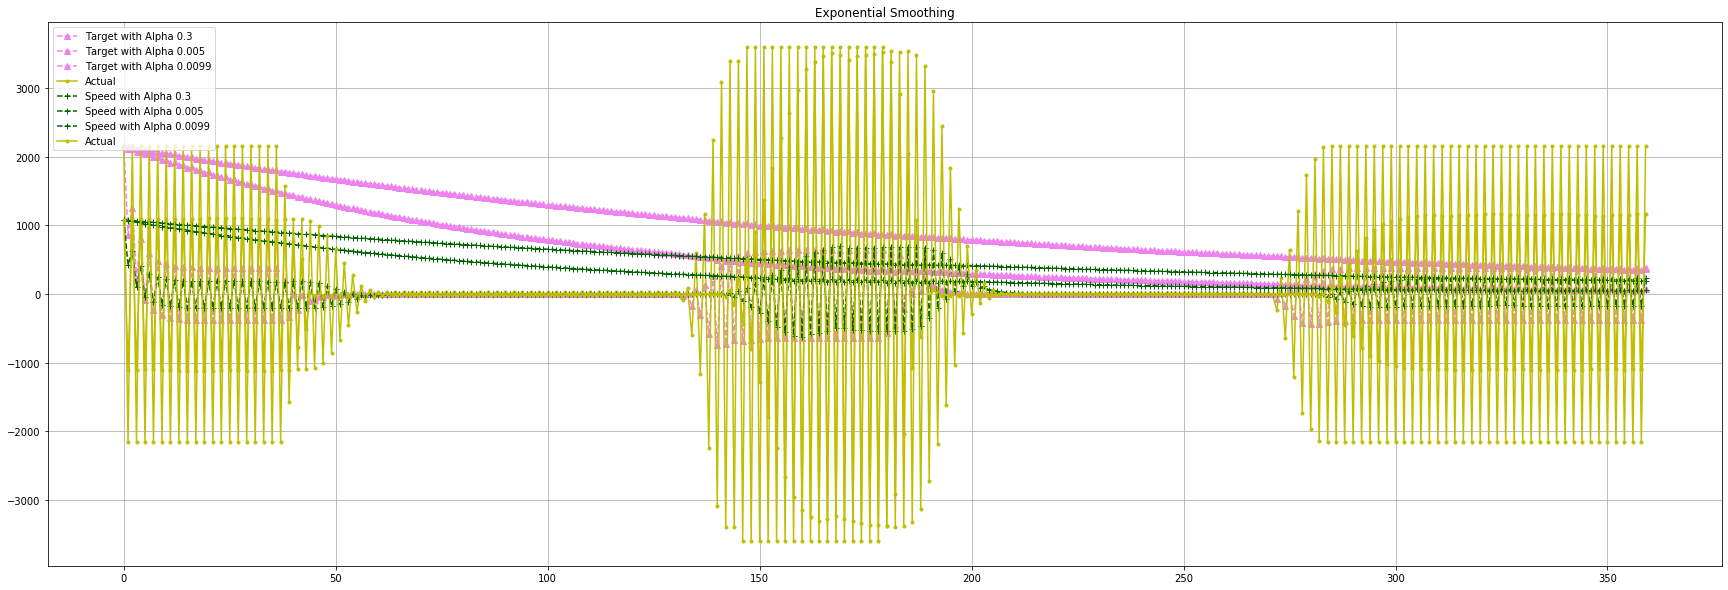

 Month  1 Day  1 Hour 18


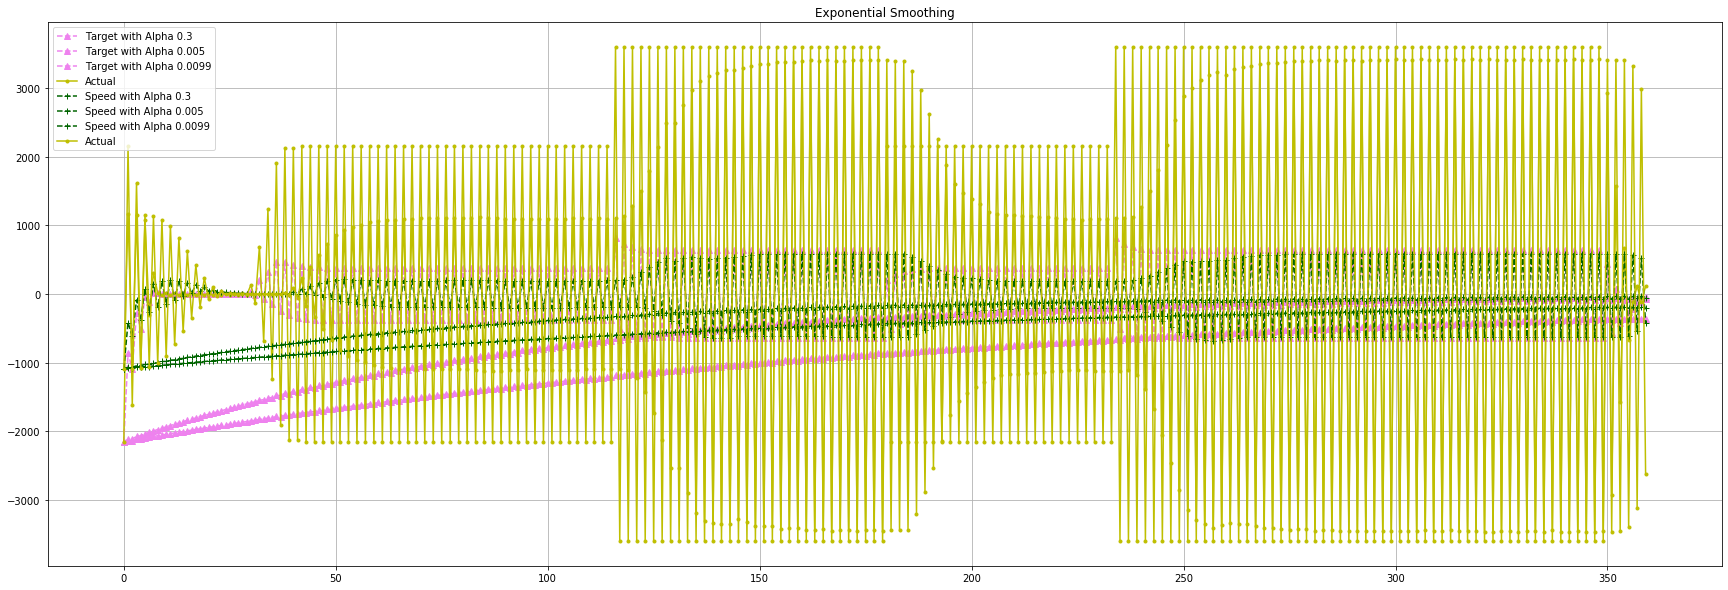

 Month  1 Day  1 Hour 19


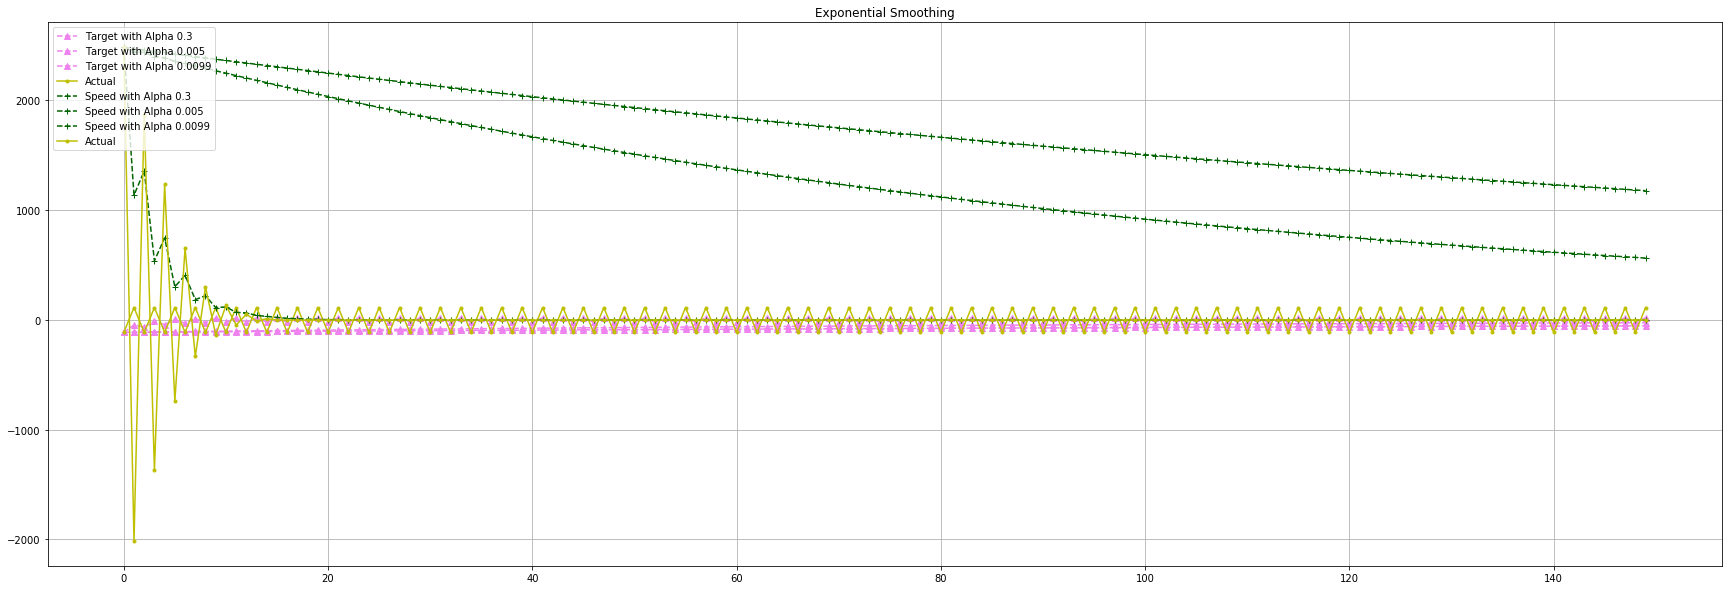

 Month  1 Day  3 Hour 11


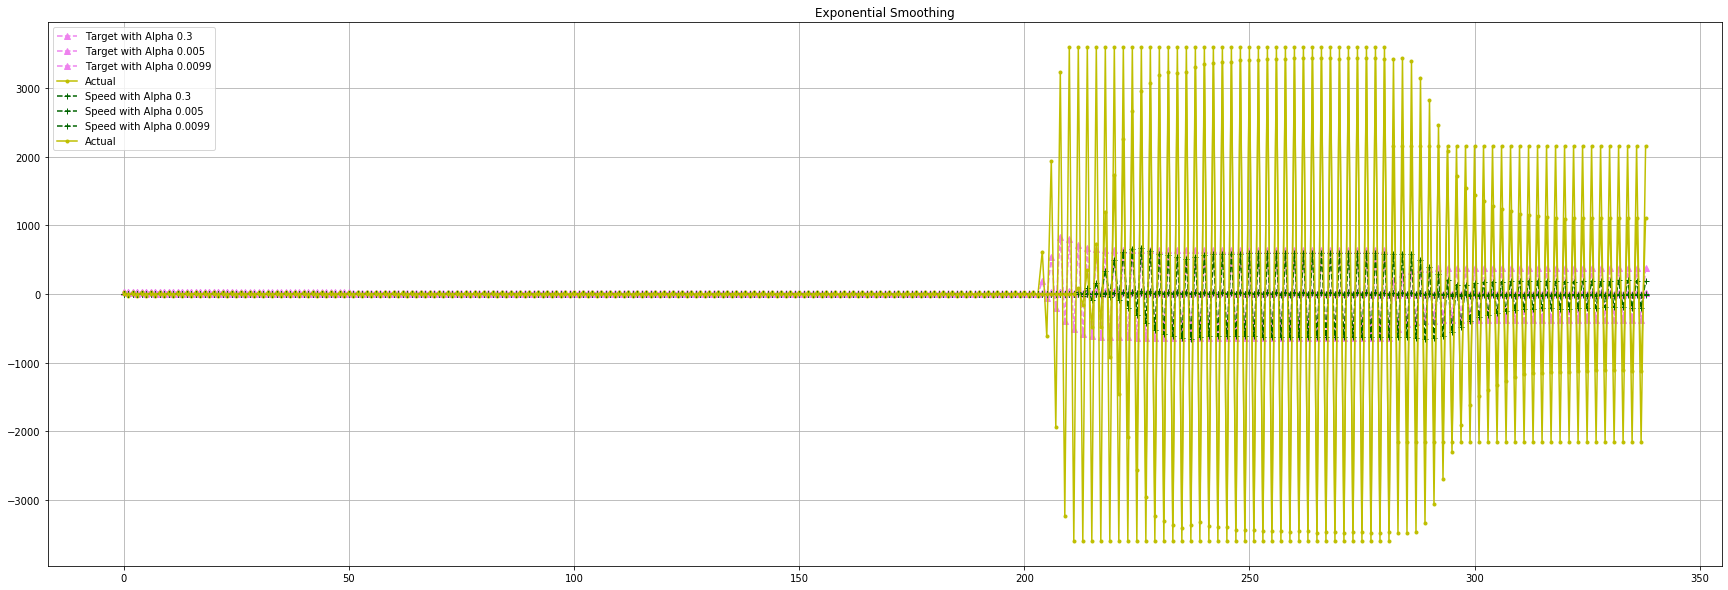

 Month  1 Day  3 Hour 12


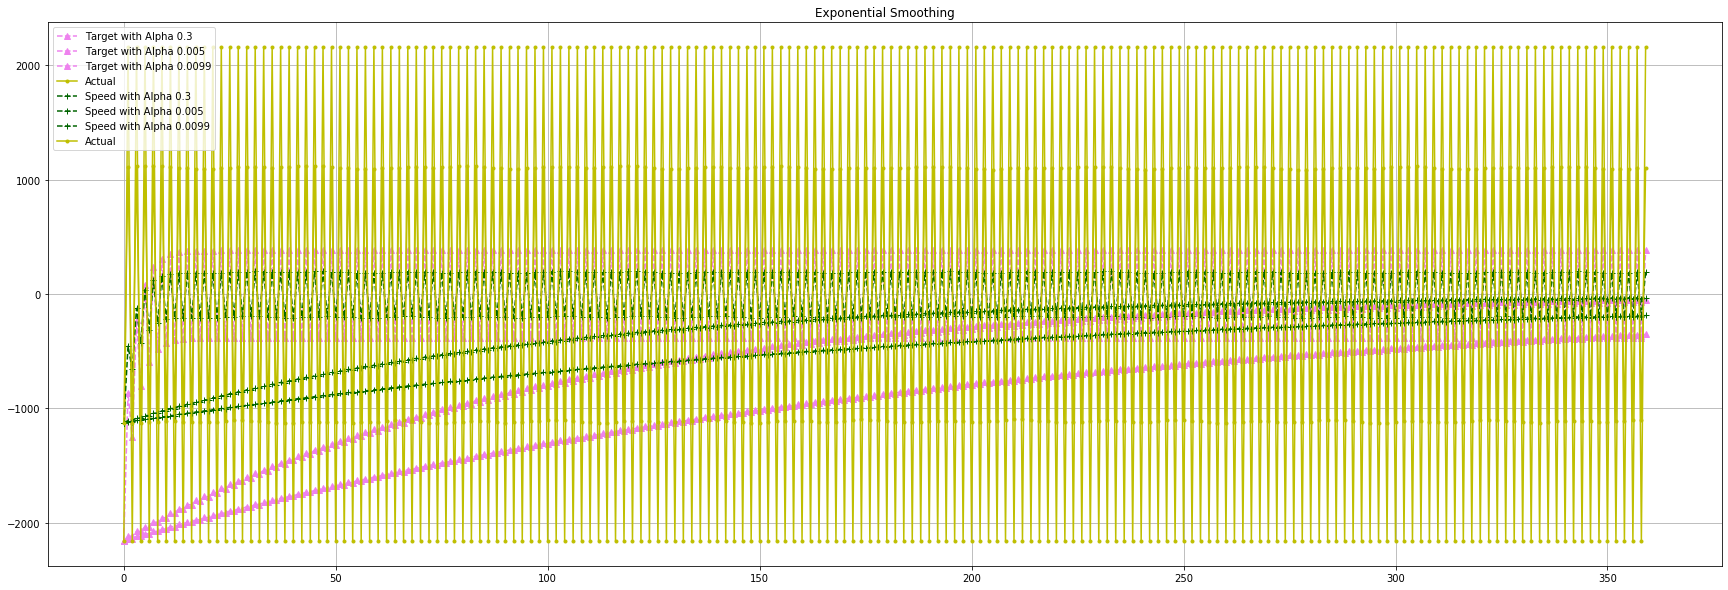

 Month  1 Day  3 Hour 13


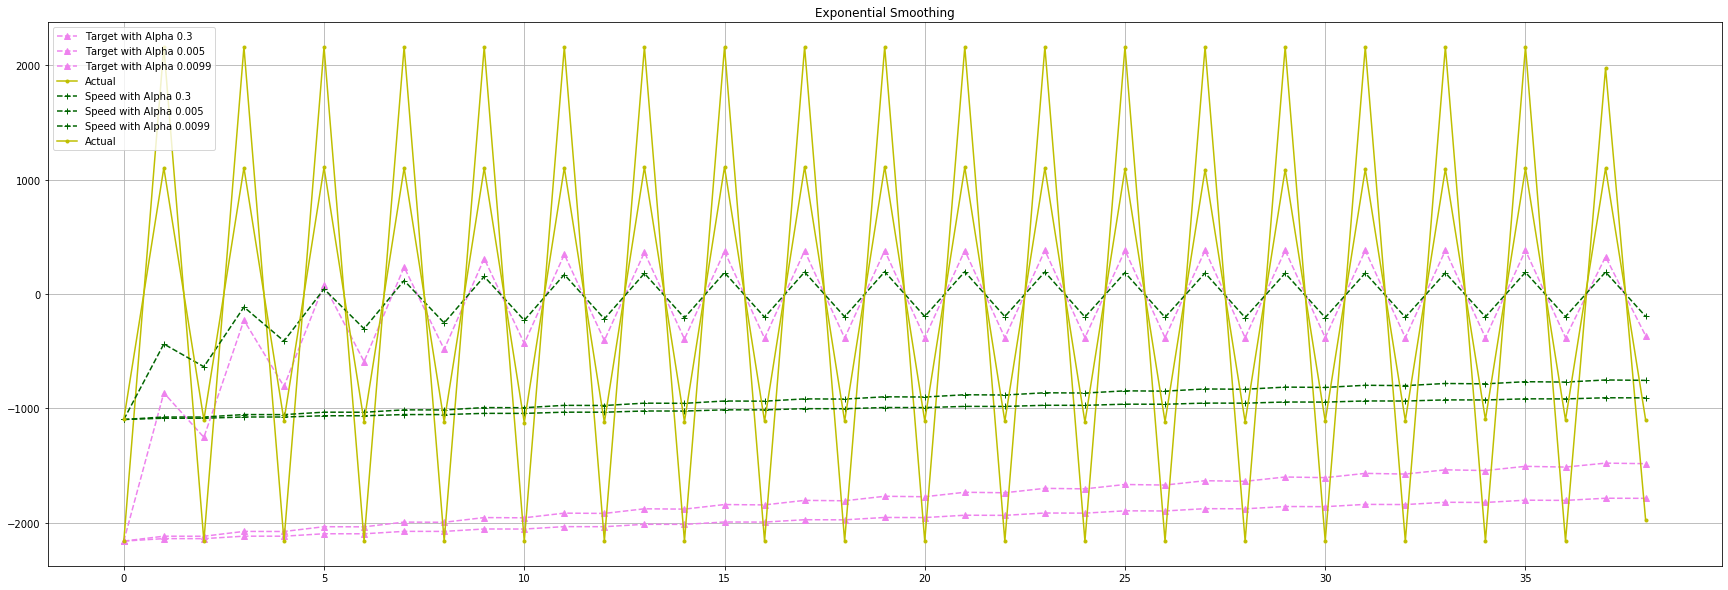

In [182]:
#labels=labeliz
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        #plotExponentialSmoothing_methods(dfHourList[i][labels[j]], labels[j], [0.3,0.005,0.0099])
        #plotExponentialSmoothing_methods(dfHourListiz[i][labeliz[j]], labeliz[j], [0.3,0.005,0.0099])
        for alpha in alphas:
            ax.plot(exponential_smoothing(dfHourListiz[i][labeliz[j]], alpha), c=colors[j],marker=markers[j],ls=linestyles[j],label="{} with Alpha {}".format(labeliz[j],alpha))
        ax.plot(dfHourListiz[i][labeliz[j]].values, "y", marker='.',label = "Actual")
    title = print(" Month ",dfHourListiz[i][labeliz[j]].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)   
    ax.set_title(title)
    plt.legend(loc="upper left")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
    plt.show()